In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table
from Ska.engarchive import fetch as fetch
from Ska.Matplotlib import plot_cxctime
from Chandra.Time import DateTime

In [2]:
def plot_hrc_shield(times, vals, color='C0', marker=None, linestyle='solid'):
    secs = times
    hrc_shield = vals
    bad = hrc_shield < 0.1
    hrc_shield = hrc_shield[~bad]
    secs = secs[~bad]

    plt.figure(1, figsize=(6, 4))
    ticks, fig, ax = plot_cxctime(secs, hrc_shield,
                                  color=color, marker=marker, linestyle=linestyle)
    xlims = ax.get_xlim()
    dx = (xlims[1] - xlims[0]) / 20.
    #ax.set_xlim(xlims[0] - dx, xlims[1] + dx)
    #ax.set_ylim(min(hrc_shield.min() * 0.5, 10.0),
    #            max(hrc_shield.max() * 2, 300.))
    #plt.plot([xlims[0] - dx, xlims[1] + dx], [235, 235], '--r')
    ax.set_yscale('log')
    plt.grid()
    #plt.title('GOES proxy for HRC shield rate / 256')
    plt.ylabel('Cts / sample')
    plt.tight_layout()    

In [3]:
# Uncomment this cell to generate the data plot
"""
date1 = '2015-05-30T00:00:00.00'
date2 = '2020-01-23T00:00:00.00'

ftp = FTP("ftp.swpc.noaa.gov")
ftp.login()

ftp.cwd("/pub/lists/pchan/")

rows = []
row = {}

mjd = DateTime(date1).mjd
while mjd < DateTime(date2).mjd:
    date = DateTime(mjd, format='mjd').fits
    tmp = date.replace("-", "")[:8]
    filename = f"{tmp}_Gp_pchan_5m.txt"
    local_filename = "tmp_protons.txt"
    
    # retrieve the file
    lf = open(local_filename, "wb")
    ftp.retrbinary("RETR " + filename, lf.write, 8*1024)
    lf.close()
    
    with open(local_filename) as lf:
        for line in lf:
            if 'Source' in line:
                satellite = line.strip()[-2:]
                row = {'satellite': satellite, 'time_mjd': mjd}
                break

    dat = ascii.read(local_filename, data_start=2)
    
    dat = Table(dat, names=NAMES)
    
    row.update({'median_p4': np.median(dat['P4']),
                'median_p5': np.median(dat['P5']),
                'median_p6': np.median(dat['P6'])})
    
    rows.append(row)

    mjd = mjd + 1

ftp.close()

t = Table(rows)

t.write('goes-2015-05-30-2020-01-22.dat', format='ascii')
""";

In [4]:
# GOES primary data since 2015-05-30, daily medians for P4, P5, P6
t = Table.read('goes-2015-05-30-2020-01-22.dat', format='ascii')

In [5]:
t.colnames

['median_p4', 'median_p5', 'median_p6', 'satellite', 'time_mjd']

In [6]:
# Daily samples of 2shldart, HRC shield rate since Apr, 2015
dat = fetch.Msid('2shldart', '2015:100:00:00:00', stat='daily')

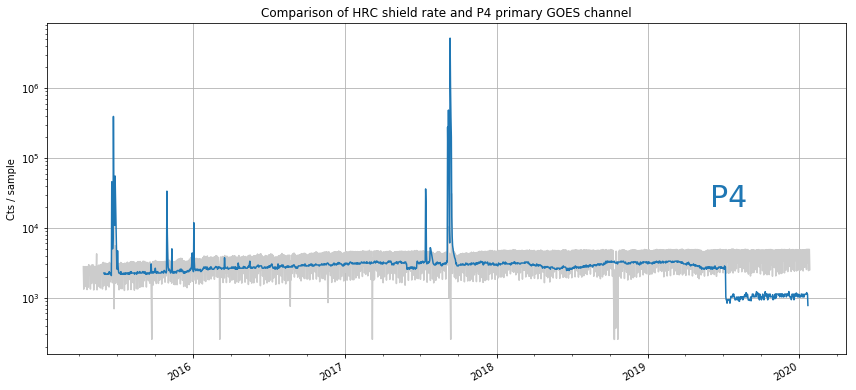

In [7]:
plt.figure(figsize=(12, 6))
plot_hrc_shield(dat.times, dat.vals, color='#cccccc')
plot_cxctime(DateTime(t['time_mjd'], format='mjd').secs, t['median_p4'] * 1.5e5, color='C0')
plt.title('Comparison of HRC shield rate and P4 primary GOES channel')
plt.text(DateTime('2019:150:00:00:00').plotdate, 2e4, 'P4', fontsize=30, color='C0');

__Figure: HRC shield rate (GRAY) compared to P4 channel of the primary GOES satellite (scaled up for the presentation purposes). Note the drop at the time of GOES-15 to GOES-14 transition in July 2019.__

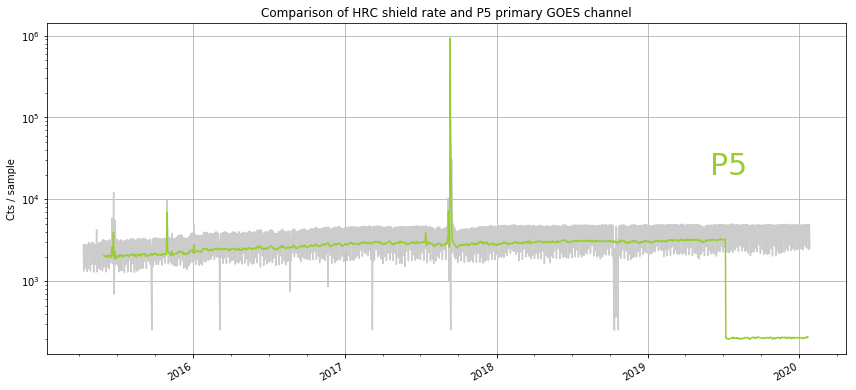

In [8]:
plt.figure(figsize=(12, 6))
plot_hrc_shield(dat.times, dat.vals, color='#cccccc')
plot_cxctime(DateTime(t['time_mjd'], format='mjd').secs, t['median_p5'] * 1.7e5, color='yellowgreen')
plt.title('Comparison of HRC shield rate and P5 primary GOES channel')
plt.text(DateTime('2019:150:00:00:00').plotdate, 2e4, 'P5', fontsize=30, color='yellowgreen');

__Figure: <font color='gray'>HRC shield rate</font> compared to <font color='yellowgreen'>P5 channel</font> of the primary GOES satellite (scaled up for the presentation purposes).__

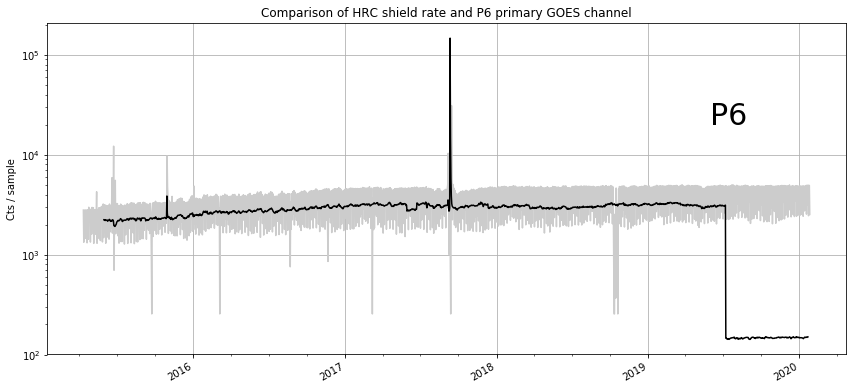

In [9]:
plt.figure(figsize=(12, 6))
plot_hrc_shield(dat.times, dat.vals, color='#cccccc')
plot_cxctime(DateTime(t['time_mjd'], format='mjd').secs, t['median_p6'] * 5.5e5, color='k')
plt.title('Comparison of HRC shield rate and P6 primary GOES channel')
plt.text(DateTime('2019:150:00:00:00').plotdate, 2e4, 'P6', fontsize=30, color='k');

__Figure: <font color='gray'>HRC shield rate</font> compared to <font color='k'>P6 channel</font> of the primary GOES satellite (scaled up for the presentation purposes).__